2019 Data Science Bowl

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from IPython.display import HTML
import warnings
pd.set_option('max_columns', 100)
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
my_pal = sns.color_palette(n_colors=10)

In [2]:
train = pd.read_csv("D:\\working folder\\data Sciense\\Repos\\2019 DS Bowl\\train.csv")
train_labels = pd.read_csv("D:\\working folder\\data Sciense\\Repos\\2019 DS Bowl\\train_labels.csv")

In [3]:
test = pd.read_csv("D:\\working folder\\data Sciense\\Repos\\2019 DS Bowl\\test.csv")
specs = pd.read_csv("D:\\working folder\\data Sciense\\Repos\\2019 DS Bowl\\specs.csv")
ss = pd.read_csv("D:\\working folder\\data Sciense\\Repos\\2019 DS Bowl\\sample_submission.csv")

In [4]:
train_ = train.sample(1000000) #sample 1M observations

In [5]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


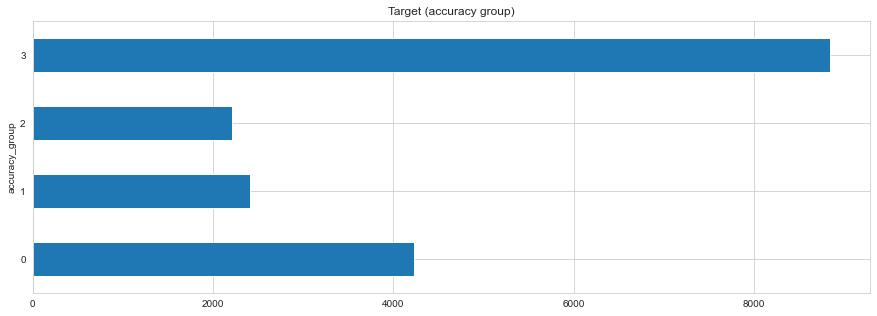

In [6]:


train_labels.groupby('accuracy_group')['game_session'].count() \
    .plot(kind='barh', figsize=(15, 5), title='Target (accuracy group)')
plt.show()



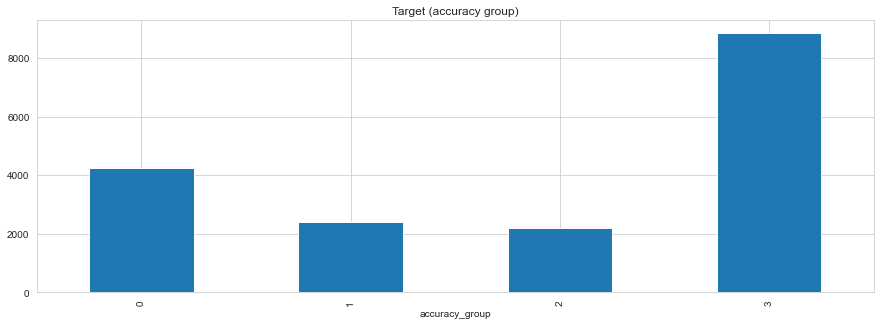

In [7]:
train_labels.groupby('accuracy_group')['game_session'].count().plot(kind='bar', figsize=(15, 5), title='Target (accuracy group)')
plt.show()

In [8]:
train_labels[['num_correct']]

,num_correct
0,1
1,0
2,1
3,1
4,1
...,...
17685,1
17686,1
17687,1
17688,0


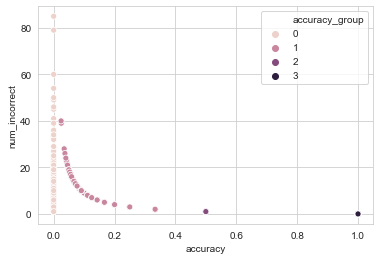

In [9]:
sns.scatterplot(train_labels['accuracy'],train_labels['num_incorrect'], \
                hue=train_labels['accuracy_group'] )
plt.show()

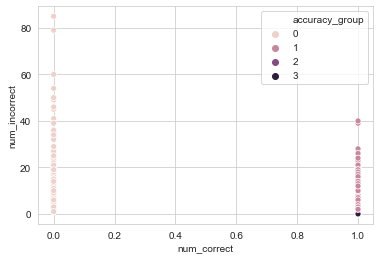

In [10]:
sns.scatterplot(train_labels['num_correct'],train_labels['num_incorrect'], \
                hue=train_labels['accuracy_group'] )
plt.show()

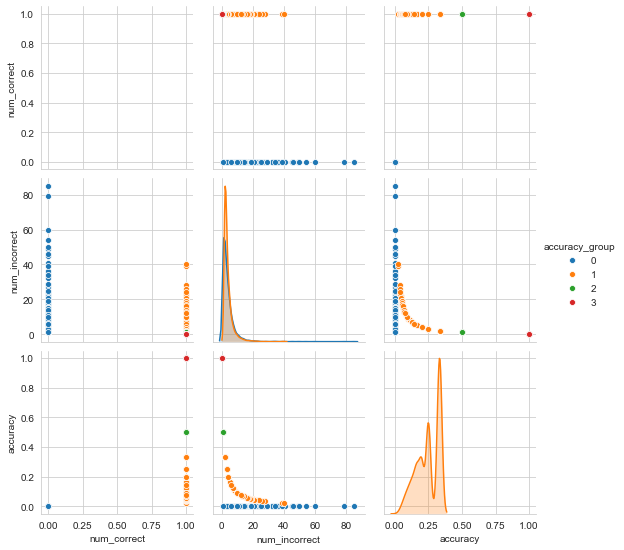

In [11]:
sns.pairplot(train_labels, hue='accuracy_group')
plt.show()

In [12]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [13]:
# Format and make date / hour features
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['date'] = train['timestamp'].dt.date
train['hour'] = train['timestamp'].dt.hour
train['weekday_name'] = train['timestamp'].dt.dayofweek
# Same for test
test['timestamp'] = pd.to_datetime(test['timestamp'])
test['date'] = test['timestamp'].dt.date
test['hour'] = test['timestamp'].dt.hour
test['weekday_name'] = test['timestamp'].dt.dayofweek

In [14]:
train.head(5)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,17,4
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-06,17,4
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,4
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,4
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,4


In [15]:
test.tail()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name
1156409,c74f40cd,46ff9d3ad2be09f2,2019-09-28 21:20:40.918000+00:00,"{""description"":""Alright! This one is the littl...",ffe774cc,39,3121,32030,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-09-28,21,5
1156410,6c930e6e,46ff9d3ad2be09f2,2019-09-28 21:20:41.493000+00:00,"{""duration"":20008,""misses"":0,""event_count"":40,...",ffe774cc,40,2030,32584,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-09-28,21,5
1156411,a5be6304,46ff9d3ad2be09f2,2019-09-28 21:20:45.499000+00:00,"{""session_duration"":36607,""exit_type"":""game_co...",ffe774cc,41,2010,36607,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-09-28,21,5
1156412,27253bdc,96d7dc31e822cedc,2019-09-28 21:21:05.670000+00:00,"{""event_code"": 2000, ""event_count"": 1}",ffe774cc,1,2000,0,Tree Top City - Level 3,Clip,TREETOPCITY,2019-09-28,21,5
1156413,f56e0afc,6897df1e7b5ccdf7,2019-09-28 21:21:56.105000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",ffe774cc,1,2000,0,Bird Measurer (Assessment),Assessment,TREETOPCITY,2019-09-28,21,5


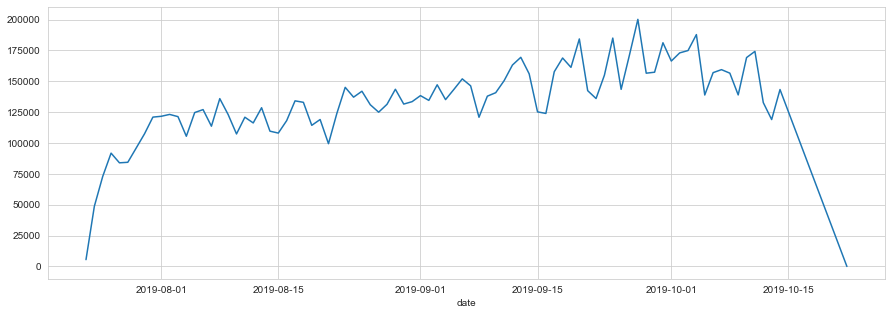

In [16]:
train.groupby('date')['event_code'].count().plot(figsize=(15, 5))

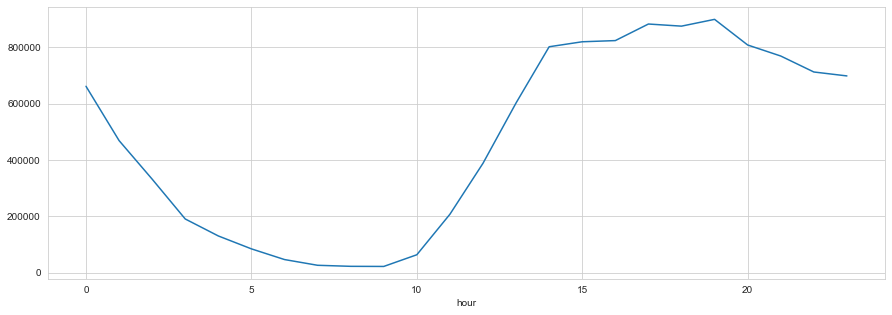

In [17]:
train.groupby('hour')['event_code'].count().plot(figsize=(15, 5))

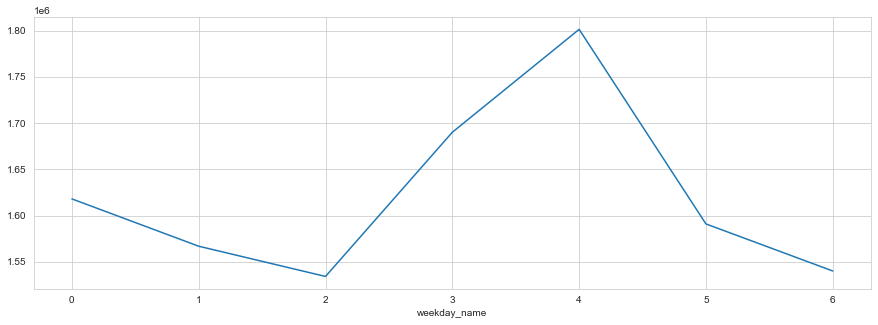

In [18]:
train.groupby('weekday_name')['event_code'].count().plot(figsize=(15, 5))

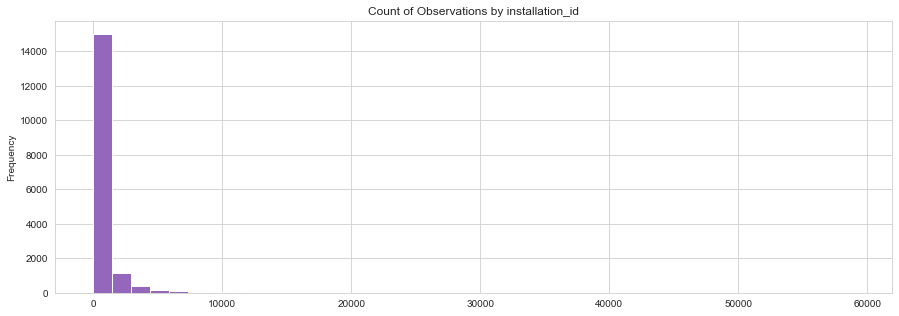

In [19]:
train.groupby('installation_id') \
    .count()['event_id'] \
    .plot(kind='hist',
          bins=40,
          color=my_pal[4],
          figsize=(15, 5),
         title='Count of Observations by installation_id')
plt.show()



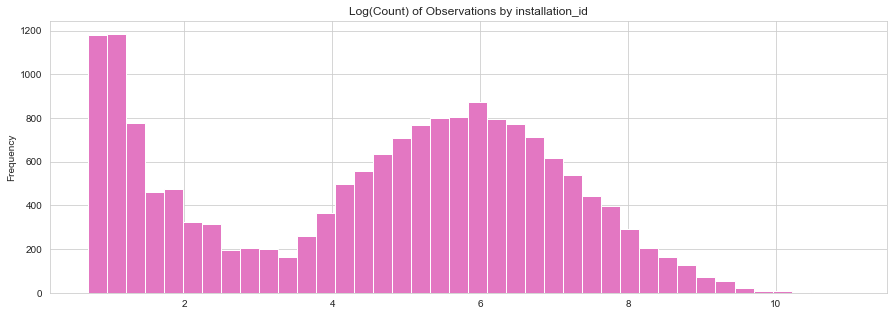

In [20]:
train.groupby('installation_id') \
    .count()['event_id'] \
    .apply(np.log1p) \
    .plot(kind='hist',
          bins=40,
          color=my_pal[6],
         figsize=(15, 5),
         title='Log(Count) of Observations by installation_id')
plt.show()


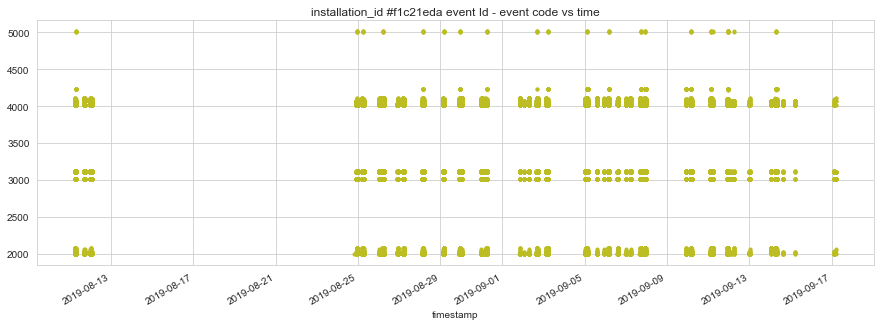

In [21]:
train.query('installation_id == "f1c21eda"') \
    .set_index('timestamp')['event_code'] \
    .plot(figsize=(15, 5),
          title='installation_id #f1c21eda event Id - event code vs time',
         style='.',
         color=my_pal[8])
plt.show()



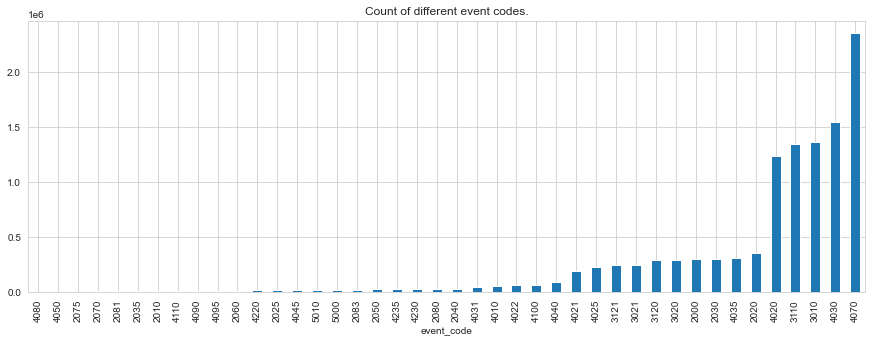

In [22]:
train.groupby('event_code') \
    .count()['event_id'] \
    .sort_values() \
    .plot(kind='bar',
         figsize=(15, 5),
         title='Count of different event codes.')
plt.show()

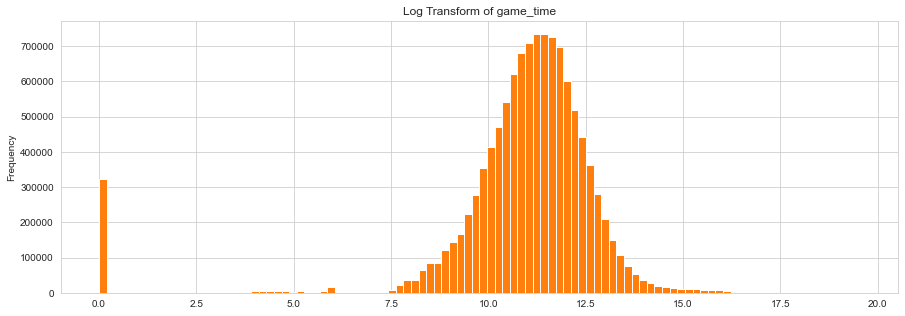

In [23]:
train['game_time'].apply(np.log1p) \
    .plot(kind='hist',
          figsize=(15, 5),
          bins=100,
          title='Log Transform of game_time',
          color=my_pal[1])
plt.show()

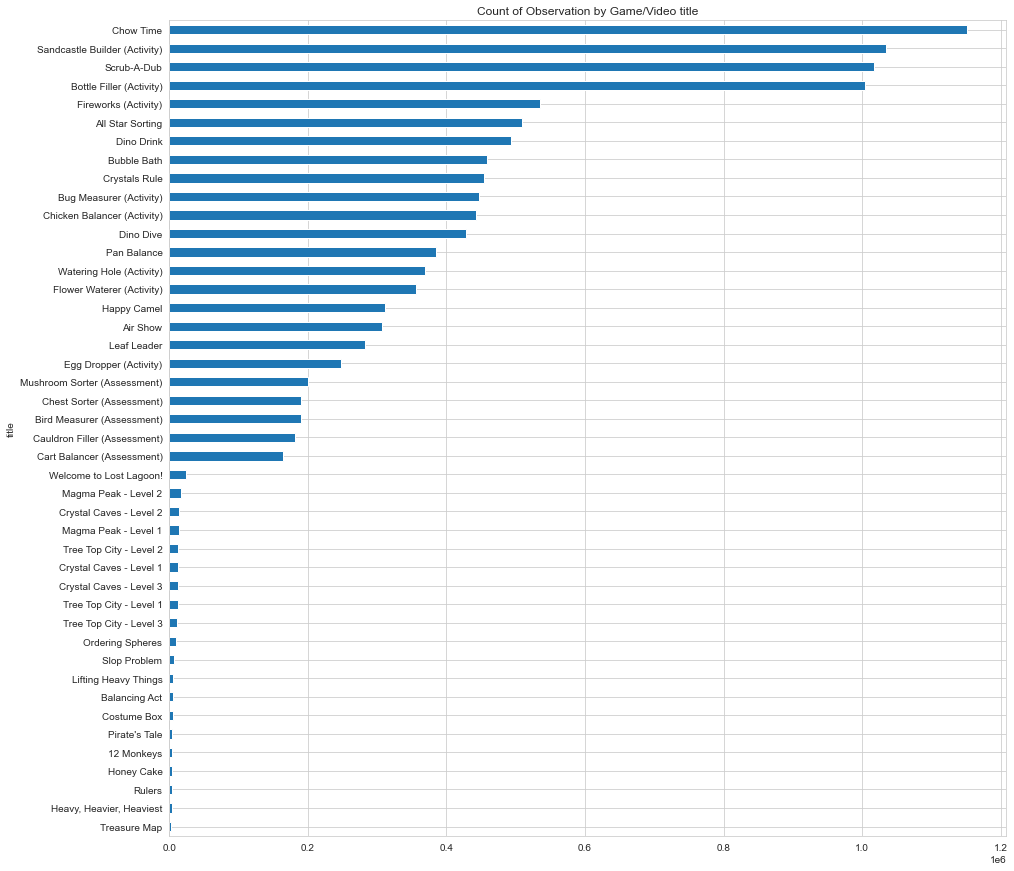

In [24]:
train.groupby('title')['event_id'] \
    .count() \
    .sort_values() \
    .plot(kind='barh',
          title='Count of Observation by Game/Video title',
         figsize=(15, 15))
plt.show()

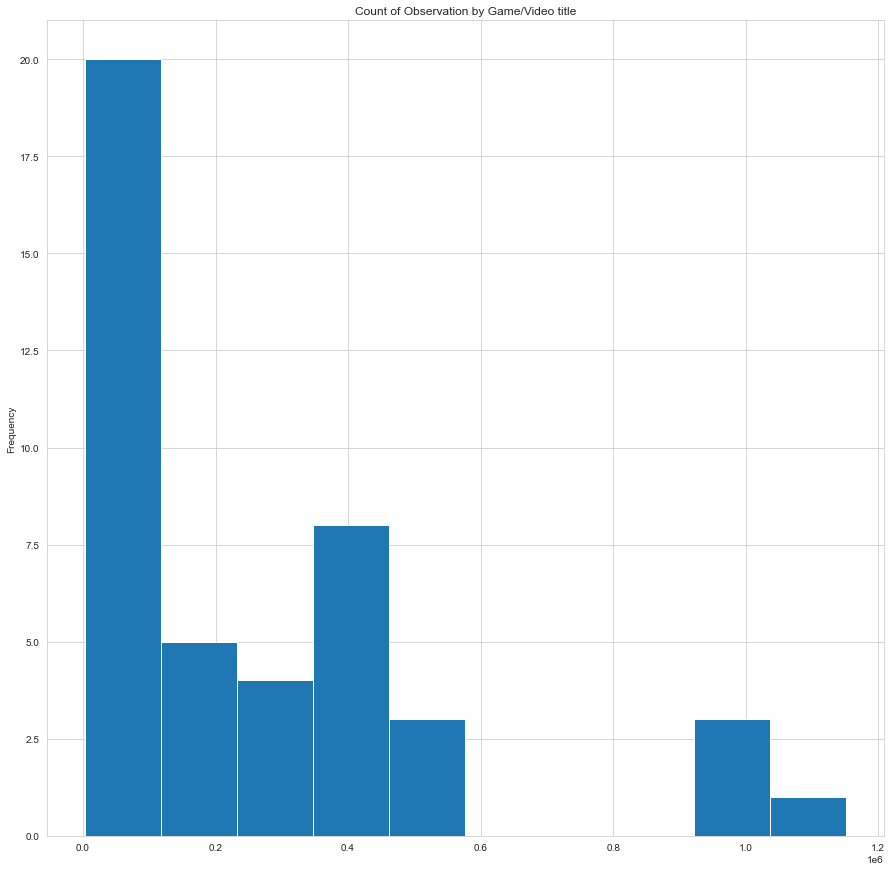

In [30]:
train.groupby('title')['event_id'] \
    .count() \
    .sort_values() \
    .plot(kind='hist',bins=10,
          title='Count of Observation by Game/Video title',
         figsize=(15, 15))
plt.show()

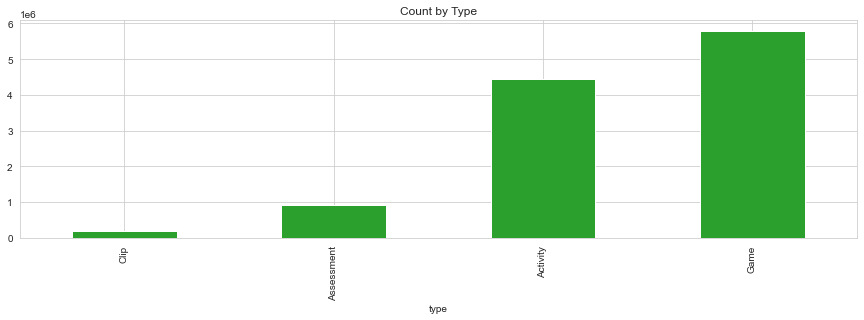

In [31]:


train.groupby('type')['event_id'] \
    .count() \
    .sort_values() \
    .plot(kind='bar',
          figsize=(15, 4),
          title='Count by Type',
          color=my_pal[2])
plt.show()

